# Q34: Full Data Science Pipeline

- Choose a dataset from Kaggle or UCI Repository.
- Perform a full pipeline: data import & cleaning, EDA & preprocessing, model training & evaluation (supervised + unsupervised), visualization & reporting insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score

In [2]:
# --- Data Import & Cleaning ---
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [3]:
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


Data description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


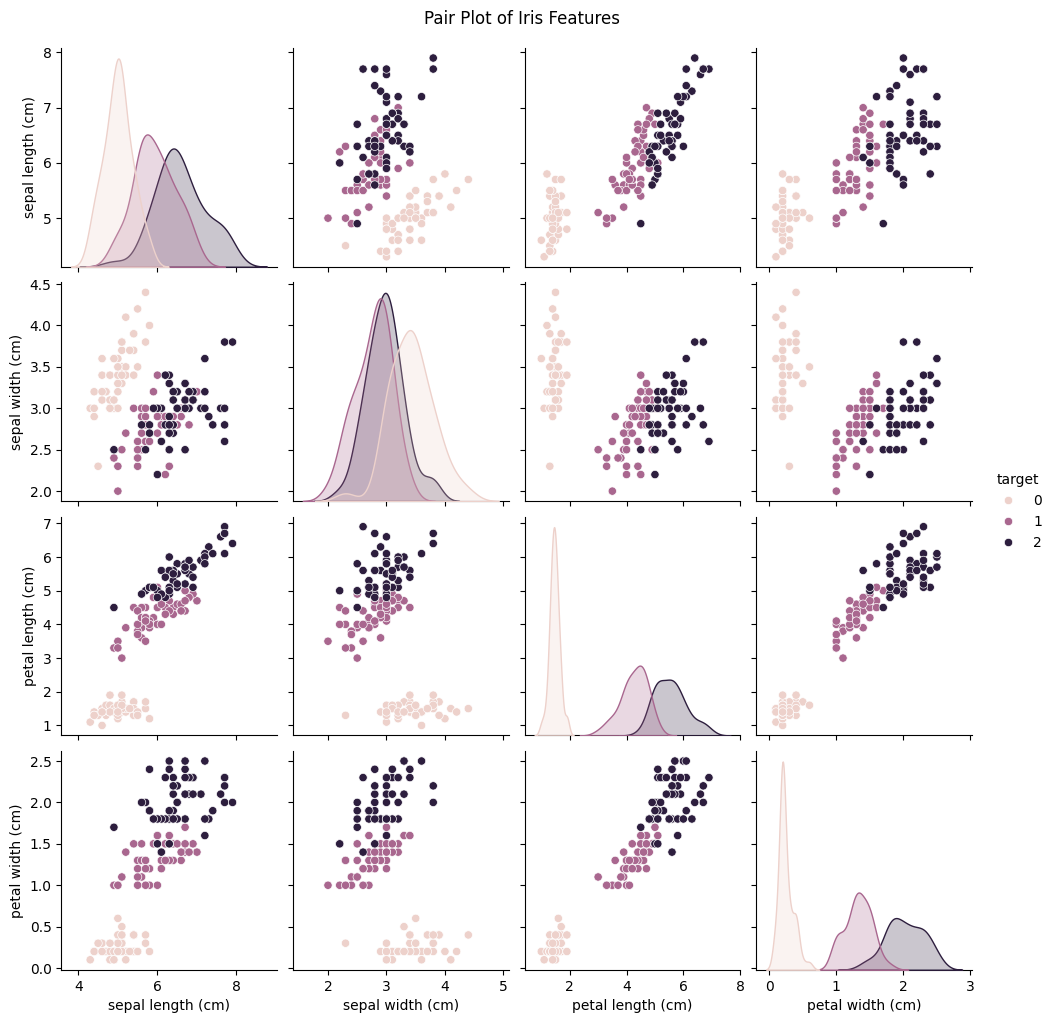

In [4]:
# --- EDA & Preprocessing ---
print('Data description:')
print(df.describe())
sns.pairplot(df, hue='target')
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [5]:
# --- Supervised Model Training & Evaluation ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



KMeans Silhouette Score: 0.4798814508199817


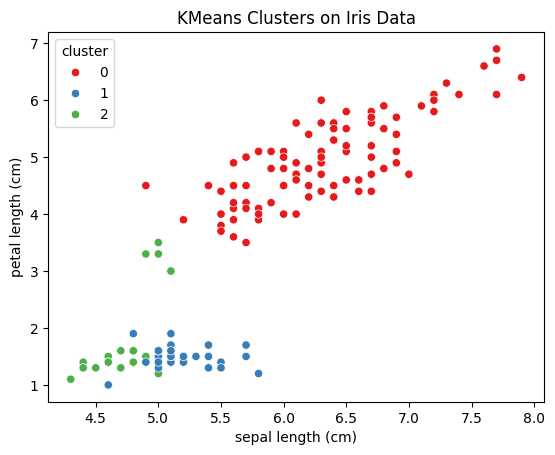

In [6]:
# --- Unsupervised Model (KMeans) ---
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters
print('KMeans Silhouette Score:', silhouette_score(X_scaled, clusters))
sns.scatterplot(x=df['sepal length (cm)'], y=df['petal length (cm)'], hue=df['cluster'], palette='Set1')
plt.title('KMeans Clusters on Iris Data')
plt.show()

In [7]:
# --- Reporting Insights ---
print('Supervised model achieves high accuracy. KMeans clusters align well with true species labels. Visualizations reveal clear separation between classes.')

Supervised model achieves high accuracy. KMeans clusters align well with true species labels. Visualizations reveal clear separation between classes.
